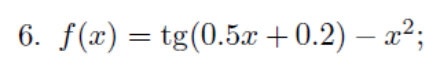

In [1]:
import scipy.sparse as sparse
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
# отрезок интерполяции 
a = -2
b = 2.5

In [2]:
def my_f(x):
    return  [(m.tan(i*0.5 + 0.2) - i*i) for i in x]

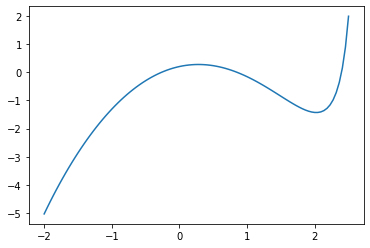

In [3]:
x = np.linspace(-2, 2.5, 100 )
plt.plot(x,my_f(x))

In [4]:
# проверяем, есть ли на главной диагонали нули (для метода Гаусса)
def no0(M, k):
    n =  M.shape[0]
    while k < n and not M[k, k]:
        k += 1
    return k

In [5]:
def Gauss(A,b):
        M = np.hstack((A, b)) # "склейка" матрицы коэффициентов при переменных и вектора свободных членов
        n = M.shape[0] 
        for k in range(n): 
            # убираем нули с главной диагонали, если они есть
            k0 = no0(M, k)
            
            if k0 != k and M[k,k] == max(M[:,k]):
                M[k0], M[k] = M[k].copy(), M[k0]   
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            # прямой ход метода Гаусса
            for r in range(k + 1, n):
                M[r, :] -= M[k, :] * M[r, k]
        
        #обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
        if b.shape[1] > 1:
            return np.hsplit(M,2)[1]
        return  (M[:,n])

In [6]:
# Метод Гаусса решения СЛАУ
def gauss(A, b):
        M = np.hstack((A, b))
        n = M.shape[0]
# Прямой ход метода Гаусса
        for k in range(n):
# Убираем нули с главной диагонали
            for j in range(n):
                if M[k, k] == 0:
                    M[k, :], M[(k+1)%n, :] = M[(k+1)%n, :].copy(), M[k, :].copy()
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            for r in range(k+1, n):
                M[r, :] -= M[k, :] * M[r, k]
      # Обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                M[r, :] -= M[k, :] * M[r, k]

        return (M[:, n])

In [9]:
A = np.array([[0.526648, -1.428027,0],[1.022913,0,1.7717377],[1.0532968,0,0.9121818]])
b = np.array([[1.0558357,-0.02807884,-0.09369074]])

In [11]:
Gauss(A,b.T)

array([-0.15045007, -0.79485187,  0.07101418])

In [23]:
# точки для 1 варианта
def Make_x(a,b,n):
    x = np.linspace(a, b, n )
    return x


In [24]:
# точки для 2 варианта
def Make_x_opt(a,b,n):
    return np.hstack((b,[(1/2)*((b - a)*m.cos((2*i+1)*m.pi/(2*(n+1)))+a+b) for i in range(n)],a))

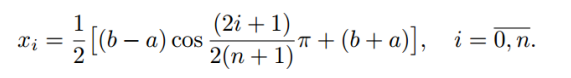

Лагранж

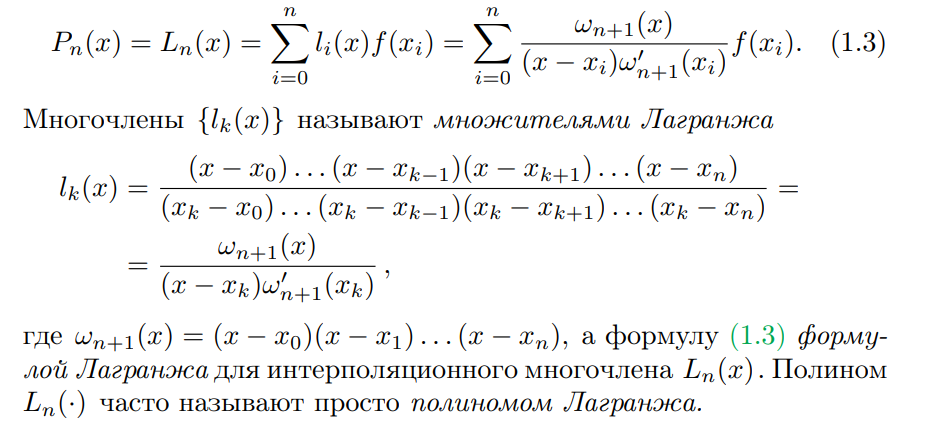

In [25]:
def Lp(x,y,t):
    n = len(x)
    ans = 0
    for i in range(n):
        p = y[i]
        for j in range(n):
            if i!=j:
                p*=(t-x[j])/(x[i]-x[j])
        ans += p
    return ans

In [26]:
def build_L(a,b):
    out_table = pd.DataFrame({'n':[],'m':[],'RLn':[],'RLoptn':[]})
    for i in range(3,50,5):
        x = Make_x(a,b,i) 
        x_ex = Make_x(a, b  ,i*10 + 100)
        x_opt = Make_x_opt(a,b,i-2)
        y = my_f(x)
        y_opt = my_f(x_opt)
        y_ex = np.array(my_f(x_ex))
        yLp_opt = np.array([Lp(x_opt,y_opt,i) for i in x_ex])
        yLp = np.array([Lp(x,y,i) for i in x_ex])
       
        RLn = max([max(yLp - y_ex),abs(min(yLp - y_ex))])
        RLoptn = max([max(yLp_opt - y_ex),abs(min(yLp_opt - y_ex))])
        
        line = {'n':int(i),'m':int(len(x_ex)),'RLn': RLn,'RLoptn':RLoptn}
        out_table=out_table.append(line,ignore_index=True)
        
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(2,2,1)
        str1 = "L" + str(i) +"(x)"
        plt.title(str1)
        plt.plot(x_ex,yLp,'black',x,y,'b*')
        plt.grid()
        
        plt.subplot(2,2,2)
        str2 = "Lopt" + str(i) +"(x)"
        plt.title(str2 )
        plt.plot(x_ex,yLp_opt,'black',x_opt,y_opt,'b*')
        plt.grid()
        
        plt.subplot(2,2,3)
        plt.title('Абсолютная погрешность')
        plt.plot(x_ex,abs(yLp - y_ex),'r')
        
      
        plt.plot(x_ex,abs(yLp_opt - y_ex))
    
        plt.grid()
      
        plt.show()  
    return out_table
        

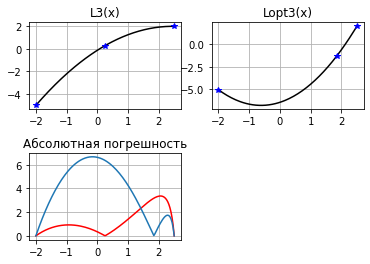

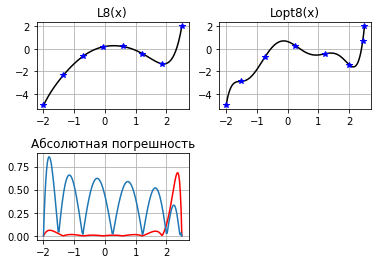

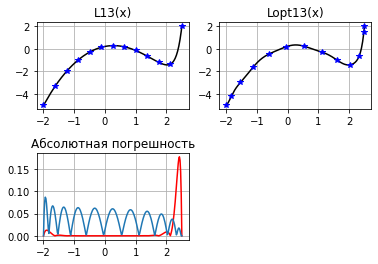

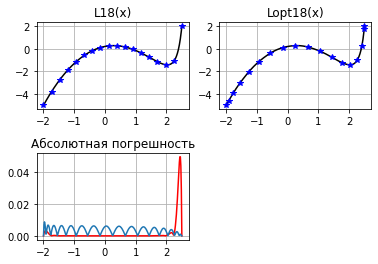

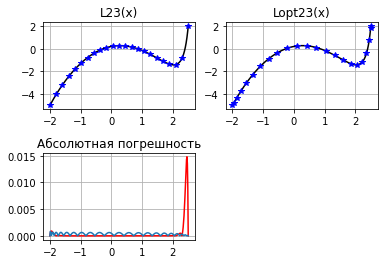

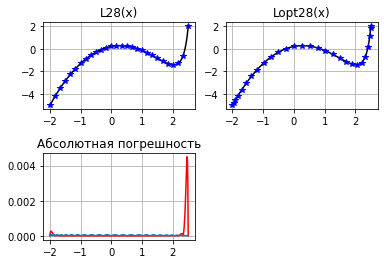

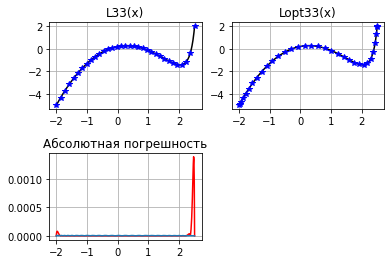

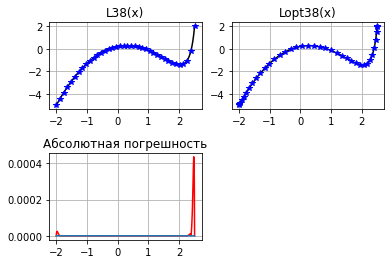

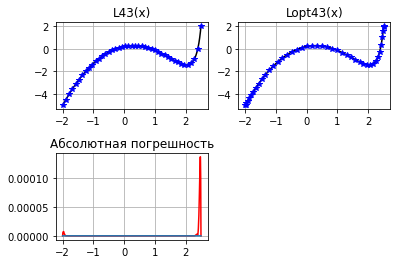

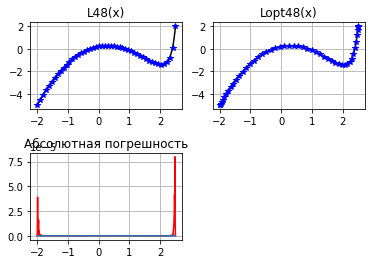

,n,m,RLn,RLoptn
0,3.0,130.0,3.359246,6.665672e+00
1,8.0,180.0,0.681874,8.558992e-01
2,13.0,230.0,0.177310,8.675012e-02
3,18.0,280.0,0.049529,8.756952e-03
4,23.0,330.0,0.014792,8.333033e-04
5,28.0,380.0,0.004503,8.860013e-05
6,33.0,430.0,0.001392,8.735669e-06
7,38.0,480.0,0.000436,8.081214e-07
8,43.0,530.0,0.000138,7.021943e-08
9,48.0,580.0,0.000080,6.694906e-09


In [27]:
build_L(-2,2.5)

Ньютон

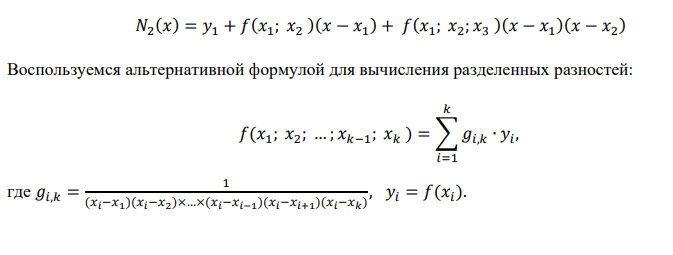

In [28]:
def g_N(x,y,ind):
    ans = 0
    for i in ind:
        p = 1
        for j in ind:
            if i != j:
                p /= (x[i] - x[j])
        ans += p*y[i]
    
    return ans

In [29]:
def top(t,x,ind):
    ans = 1
    for i in ind:
        ans *=(t - x[i])
    return ans
        

In [30]:
def Np(x,y,t):
    n = len(x)
    ans = 0
    for i in range(n):
        p = 1
        ind = np.arange(0,i+1)
        p = p*top(t,x,ind[:-1])*g_N(x,y,ind)
        ans += p
    return ans

In [31]:
def build_N(a,b):
    out_table = pd.DataFrame({'n':[],'m':[],'RLn':[],'RLoptn':[]})
    for i in range(4,50,5):
        x = Make_x(a,b,i) 
        x_ex = Make_x(a, b,i*10 + 100)
        x_opt = Make_x_opt(a,b,i-2)
        
        y = my_f(x)
        y_opt = my_f(x_opt)
        y_ex = np.array(my_f(x_ex))
        yNp_opt = np.array([Np(x_opt,y_opt,i) for i in x_ex])
        yNp = np.array([Np(x,y,i) for i in x_ex])
        
        RNn = max([max(yNp - y_ex),abs(min(yNp - y_ex))])
        RNoptn = max([max(yNp_opt - y_ex),abs(min(yNp_opt - y_ex))])
        
        line = {'n':int(i),'m':int(len(x_ex)),'RLn': RNn,'RLoptn':RNoptn}
        out_table=out_table.append(line,ignore_index=True)
        
        plt.subplot(1,2,1)
        str1 = "N" + str(i) +"(x)"
        plt.title(str1)
        plt.plot(x_ex,yNp,'black',x,y,'b*')
        plt.grid()
        
        plt.subplot(1,2,2)
        plt.plot(x_ex,yNp_opt,'black',x_opt,y_opt,'b*')
        str2 = "Nopt" + str(i) +"(x)"
        plt.title(str2)
        plt.grid()
        plt.show()
    return out_table
        

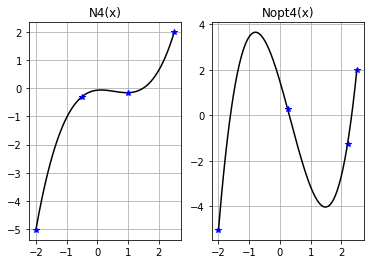

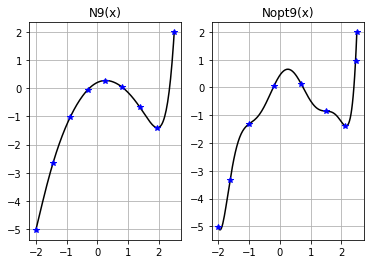

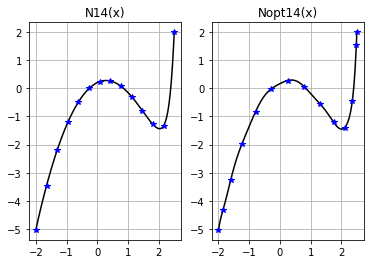

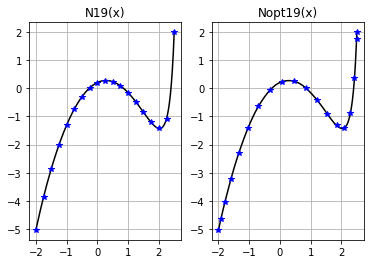

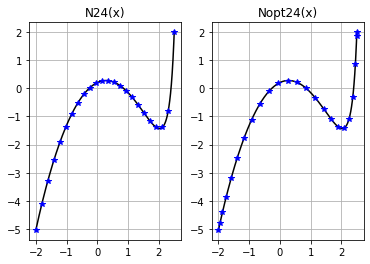

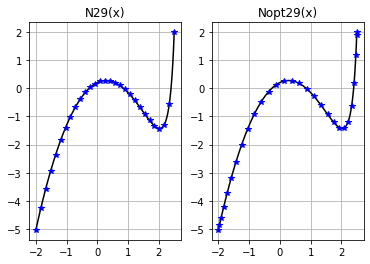

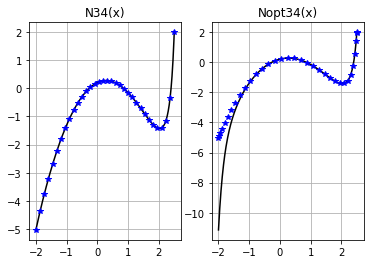

In [ ]:
build_N(-2,2.5)

Сплайны


Линейный сплайн

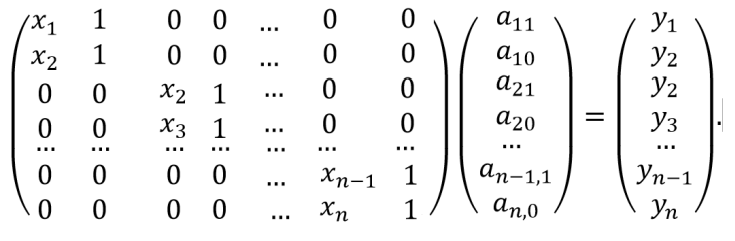

In [ ]:
def s1(x,y,t):
    k = len(x)
    A = np.zeros((2,2))
    for i in range(1,k):
        if (x[i-1] <= t) and (x[i] >= t):
            A[0,0] = x[i-1]
            A[0,1] = 1
            A[1,0] = x[i] 
            A[1,1] = 1
            yy = np.array([[y[i-1]], [y[i]]])
            a = Gauss(A,yy)
            return a[0]*t + a[1]
    
    
    
        

In [ ]:
def build_s1(a,b):
    out_table = pd.DataFrame({'n':[],'m':[],'RS1,0':[],'RS1,0opt':[]})
    for i in range(4,50,5):
        x = Make_x(a,b,i) 
        x_ex = Make_x(a, b,i*10 + 100)
        x_opt = Make_x_opt(a,b,i-2)[::-1]
        
        y = my_f(x)
        y_opt = my_f(x_opt)
        y_ex = np.array(my_f(x_ex))
        ys1_opt = np.array([s1(x_opt,y_opt,i) for i in x_ex])
        ys1 = np.array([s1(x,y,i) for i in x_ex])
        
        Rs1 = max([max(ys1 - y_ex),abs(min(ys1 - y_ex))])
        Rs1optn = max([max(ys1_opt - y_ex),abs(min(ys1_opt - y_ex))])
        
        line = {'n':int(i),'m':int(len(x_ex)),'RS1,0': Rs1,'RS1,0opt':Rs1optn}
        out_table=out_table.append(line,ignore_index=True)
        
        
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(1,2,1)
        str1 = "S1,0 " + str(i) +"(x)"
        plt.title(str1)
        plt.plot(x_ex,ys1,'black',x,y,'b*')
        plt.grid()
        
        plt.subplot(1,2,2)
        str2 = "S1,0opt" + str(i) +"(x)"
        plt.title(str2 )
        plt.plot(x_ex,ys1_opt,'black',x_opt,y_opt,'b*')
        plt.grid()
        
        plt.show()
    return out_table
        

In [ ]:
build_s1(-2,2.5)

Квадратичный сплайн

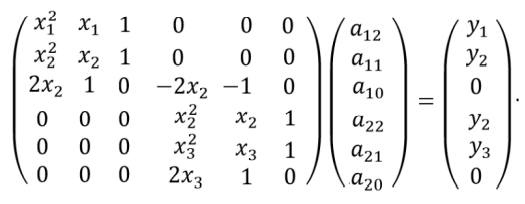

In [ ]:
def s2(x,y,t):
   
    p = len(x)
    k = (p-1)*3
    yy = np.zeros((k,1))
    yy[0,0] = y[0]
    yy[k-2,0] = y[-1]
    A = np.zeros((k,k))
    A[0,:3] = np.array([x[0]**2,x[0],1])
    A[k-1,k-3:k-1] = np.array([x[-1]*2,1])
    A[k-2,k-3:] = np.array([x[-1]**2,x[-1],1])
    
    for i in range(1,p-1):
        yy[1+(i-1)*3,0] = y[i]
        yy[3+(i-1)*3,0] = y[i]
      
        A[1+(i-1)*3,(i-1)*3:(i - 1)*3 + 3] = np.array([x[i]**2,x[i],1])
        A[2+(i-1)*3,(i-1)*3:(i - 1)*3 + 5] = np.array([2*x[i],1,0,-2*x[i],-1])
        A[3+(i-1)*3,i*3:i*3 + 3] = np.array([x[i]**2,x[i],1])
    
    a = Gauss(A,yy)

    for i in range(p-1):
        if ((t >= x[i]) & (x[i+1] >= t)):
            return (a[i*3]*t**2 + a[i*3 + 1]*t + a[i*3 + 2])

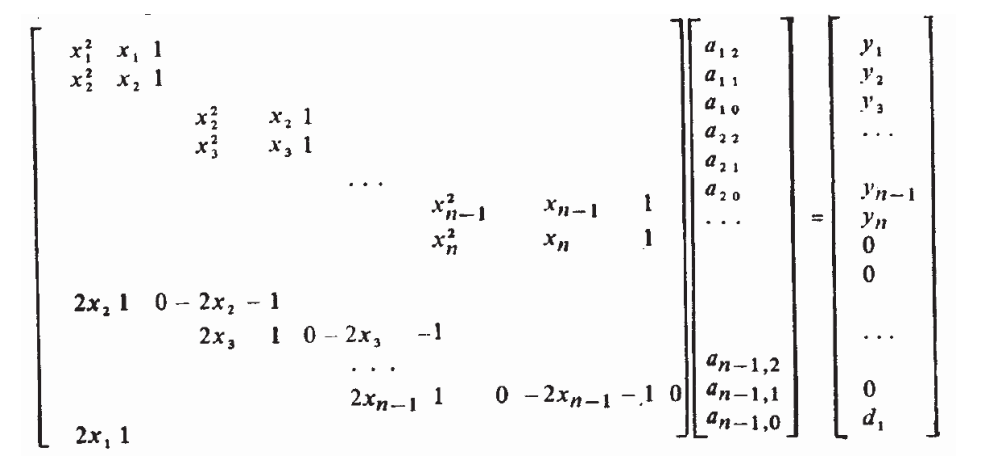

In [ ]:
def s2(x,y,t):
   
    p = len(x)
    k = (p-1)*3
    yy = np.zeros((k,1))
    yy[0,0] = y[0]
    yy[k-2,0] = y[-1]
    A = np.zeros((k,k))
    A[0,:3] = np.array([x[0]**2,x[0],1])
    A[k-1,k-3:k-1] = np.array([x[-1]*2,1])
    A[k-2,k-3:] = np.array([x[-1]**2,x[-1],1])
    
    for i in range(1,p-1):
        yy[1+(i-1)*3,0] = y[i]
        yy[3+(i-1)*3,0] = y[i]
      
        A[1+(i-1)*3,(i-1)*3:(i - 1)*3 + 3] = np.array([x[i]**2,x[i],1])
        A[2+(i-1)*3,(i-1)*3:(i - 1)*3 + 5] = np.array([2*x[i],1,0,-2*x[i],-1])
        A[3+(i-1)*3,i*3:i*3 + 3] = np.array([x[i]**2,x[i],1])
    
    a = Gauss(A,yy)

    for i in range(p-1):
        if ((t >= x[i]) & (x[i+1] >= t)):
            return (a[i*3]*t**2 + a[i*3 + 1]*t + a[i*3 + 2])

In [ ]:
def build_s2(a,b):
    out_table = pd.DataFrame({'n':[],'m':[],'RS2,1':[],'RS2,1opt':[]})
    for i in range(3,50,5):
        x = Make_x(a,b,i) 
       
        x_ex = Make_x(a, b,i*10 + 100)
        x_opt = Make_x_opt(a,b,i-2)[::-1]
        y = my_f(x)
        y_opt = my_f(x_opt)
        y_ex = np.array(my_f(x_ex))
        ys2 = np.array([s2(x,y,i) for i in x_ex])
        ys2_opt = np.array([s2(x_opt,y_opt,i) for i in x_ex])
        
        

        Rs2 = max([max(ys2 - y_ex),abs(min(ys2 - y_ex))])
        Rs2optn = max([max(ys2_opt - y_ex),abs(min(ys2_opt - y_ex))])
        
        line = {'n':int(i),'m':int(len(x_ex)),'RS2,1': Rs2,'RS2,1opt':Rs2optn}
        out_table=out_table.append(line,ignore_index=True)
        
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(1,2,1)
        str1 = "S2,1 " + str(i) +"(x)"
        plt.title(str1)
        plt.plot(x_ex,ys2,'black',x,y,'b*')
        plt.grid()
        
        plt.subplot(1,2,2)
        str2 = "S2,1opt" + str(i) +"(x)"
        plt.title(str2 )
        plt.plot(x_ex,ys2_opt,'black',x_opt,y_opt,'b*')
        plt.grid()
        
       
        plt.show()
    return out_table
 

In [ ]:
build_s2(-2,2.5)

Кубический сплайн

In [ ]:
def s3(x,y,t):
    k = len(x)
    h = np.zeros((k-1))
    y_ = np.zeros((k))
    gam = np.zeros((k-2,1))
    for i in range(k-1):
        h[i] = x[i+1] - x[i]
    H = np.zeros((k-2,k-2))
    H[0,0] = 2*(h[0] +h[1])
    H[0,1] = h[1]
    H[-1,-1] = 2*(h[-2] + h[-1])
    H[-1,-2] = h[-1]
    for i in range(1,k-3):
        H[i,i] = 2*(h[i] + h[i+1])
        H[i,i-1] = h[i]
        H[i,i+1] = h[i+1]
    for i in range(1,k-2):
        gam[i,0] = 6*((y[i+1] - y[i])/h[i] - (y[i] - y[i-1])/h[i-1])
    
    y__ = Gauss(H,gam)
    y__ = np.hstack((0,y__,0))
    for i in range(1,k-1):
        y_[i] = (y[i+1]-y[i])/h[i] - y__[i+1]*h[i]/6 - y__[i]*h[i]/3 
    for i in range(k):
        if ((t >= x[i]) & (x[i+1] >= t)):
            return y[i] + y_[i]*(t-x[i])+y__[i]*((t - x[i])**2)/2 +((t -x[i])**3)*(y__[i+1]-y__[i])/(6*h[i])

In [ ]:
def build_s3(a,b):
    out_table = pd.DataFrame({'n':[],'m':[],'RS3,2':[],'RS3,2opt':[]})
    for i in range(4,50,5):
        x = Make_x(a,b,i) 
        x_ex = Make_x(a, b,i*10 + 100)
        x_opt = Make_x_opt(a,b,i-2)[::-1]
        y = my_f(x)
        y_opt = my_f(x_opt)
        y_ex = np.array(my_f(x_ex))
        ys3 = np.array([s3(x,y,i) for i in x_ex])
        ys3_opt = np.array([s3(x_opt,y_opt,i) for i in x_ex])
        
        

        Rs3 = max([max(ys3 - y_ex),abs(min(ys3 - y_ex))])
        Rs3optn = max([max(ys3_opt - y_ex),abs(min(ys3_opt - y_ex))])
        
        line = {'n':int(i),'m':int(len(x_ex)),'RS3,2': Rs3,'RS3,2opt':Rs3optn}
        out_table=out_table.append(line,ignore_index=True)
        
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(2,2,1)
        str1 = "S3,2 " + str(i) +"(x)"
        plt.title(str1)
        plt.plot(x_ex,ys3,'black',x,y,'b*')
        plt.grid()
        
        plt.subplot(2,2,2)
        str2 = "S3,2opt" + str(i) +"(x)"
        plt.title(str2 )
        plt.plot(x_ex,ys3_opt,'black',x_opt,y_opt,'b*')
        plt.grid()
        plt.subplot(2,2,3)
        plt.title('Абсолютная погрешность')
        plt.plot(x_ex,abs(ys3 - y_ex),'r')
        
      
        plt.plot(x_ex,abs(ys3_opt - y_ex))
        plt.grid()
        
        
        plt.show()
    return out_table

In [ ]:
build_s3(a,b)

In [ ]:
Gauss(A,b)